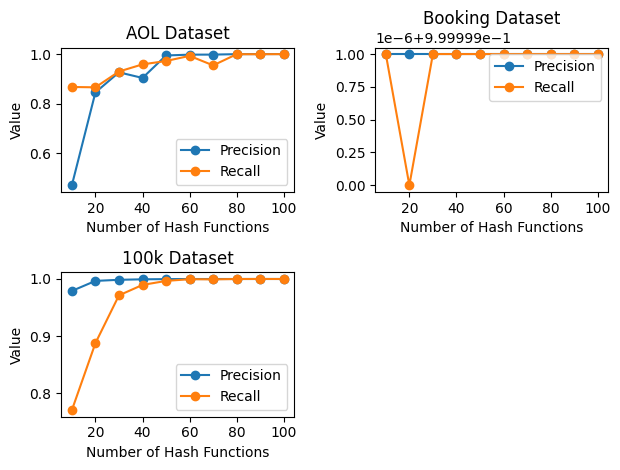

In [14]:
import matplotlib.pyplot as plt

# 定义数据集名称
datasets = ["AOL", "Booking", "100k"]

# 为每个数据集初始化字典
data = {name: {"num_of_hashfunc": [], "precision": [], "recall": [], "time": None} for name in datasets}
# 读取数据
with open("experiment.txt", "r") as f:
    lines = f.readlines()

current_dataset = None
for line in lines:
    line = line.strip()
    if line is None:
        continue
        
    if line in datasets:  # 确定当前数据集
        current_dataset = line
    elif line.startswith("num_of_hashfunc"):  # 读取hash函数数量
        num = line.split(":")[1]
        data[current_dataset]["num_of_hashfunc"].append(int(num))
    elif line.startswith("precision"):  # 读取精度
        precision = line.split(":")[1]
        data[current_dataset]["precision"].append(float(precision))
    elif line.startswith("recall"):  # 读取召回率
        recall = line.split(":")[1]
        data[current_dataset]["recall"].append(float(recall))
    elif line.startswith("time"):  # 读取时间
        time = line.split(":")[1].rstrip('s')
        data[current_dataset]["time"] = float(time)

# 绘图
for i,dataset in enumerate(datasets):

    plt.subplot(2,2,i+1)
    plt.plot(data[dataset]["num_of_hashfunc"], data[dataset]["precision"], marker='o', label='Precision')
    plt.plot(data[dataset]["num_of_hashfunc"], data[dataset]["recall"], marker='o', label='Recall')

    plt.title(f"{dataset} Dataset")
    plt.xlabel("Number of Hash Functions")
    plt.ylabel("Value")
    plt.legend()

plt.tight_layout()
plt.show()


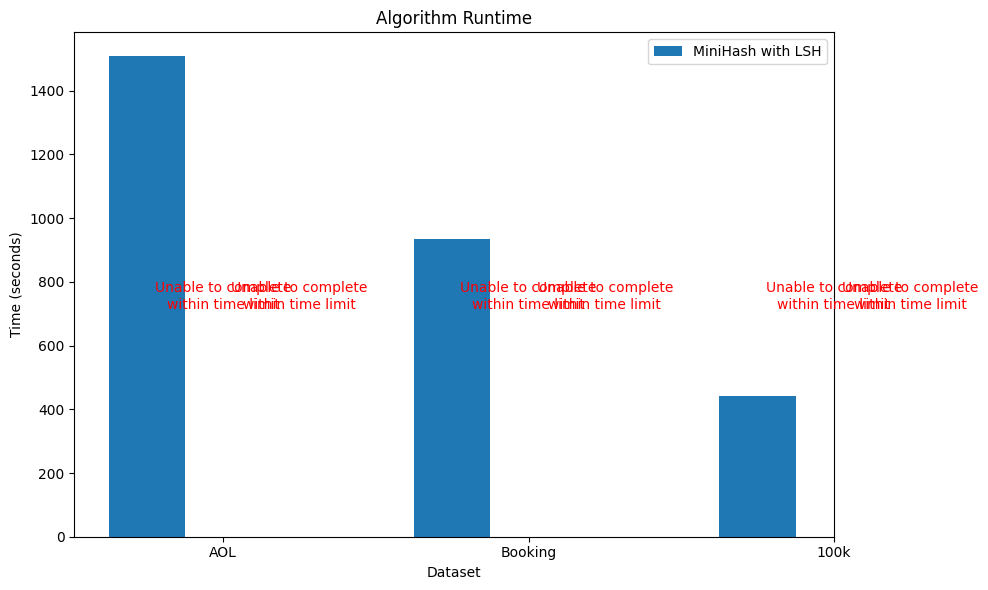

In [15]:
import matplotlib.pyplot as plt

# 定义算法名称
algorithms = ["MiniHash with LSH", "Naive", "MiniHash without LSH"]

# 为每个算法初始化字典
data2 = {name: {"time": []} for name in algorithms}
data2["MiniHash with LSH"]["time"] = [x['time'] for x in data.values()] # 这是给定的MiniHash with LSH在AOL，Booking和100k数据集上的运行时间
data2["Naive"]["time"] = [None, None, None]  # Naive算法在所有数据集上都无法在一定时间内完成
data2["MiniHash without LSH"]["time"] = [None, None, None]  # MiniHash without LSH算法在所有数据集上都无法在一定时间内完成

# 定义数据集名称
datasets = ["AOL", "Booking", "100k"]

# 绘制时间条形图
plt.figure(figsize=(10, 6))

bar_width = 0.25
index = range(len(datasets))

for i, algorithm in enumerate(algorithms):
    times = data2[algorithm]["time"]
    if None not in times:
        plt.bar(datasets, times, width=bar_width, label=algorithm)

plt.title("Algorithm Runtime")
plt.xlabel("Dataset")
plt.ylabel("Time (seconds)")
plt.xticks([r + bar_width for r in range(len(datasets))], datasets)
plt.legend()

# 标注无法完成的任务
for i, algorithm in enumerate(algorithms):
    times = data2[algorithm]["time"]
    for j, time in enumerate(times):
        if time is None:
            plt.text(j + i * bar_width, max(data2["MiniHash with LSH"]["time"]) * 0.5, "Unable to complete\nwithin time limit", ha='center', va='center', color='red')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# 使用快排
